In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [141]:
test = pd.read_csv("test.csv")
train =  pd.read_csv("train.csv")
sample = pd.read_csv("gender_submission.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
test = test.merge(sample, left_on='PassengerId', right_on='PassengerId')

In [143]:
df_all = pd.concat([train, test], sort=False, ignore_index=True)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [144]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [145]:
df_all.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Descrição
~~~
Survived (Sobreviveu): 0 = Não, 1 = Sim
Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
Sex (Sexo): Sexo do passageiro
Age (Idade): Idade em anos
Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
Parch: Quantidade de pais / crianças a bordo do Titanic
Ticket (Bilhete): Número do bilhete de embarque
Fare (Tarifa): Tarifa paga pelo Passageiro
Cabin (Cabine): Número de cabine
Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

~~~

In [146]:
df_all.columns = ['Id','sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'QT_irmao_conjuge', 'Qt_pais_crianca', 'bilhete', 'Tarifa', 'Cabine', 'Embarque']

<AxesSubplot:>

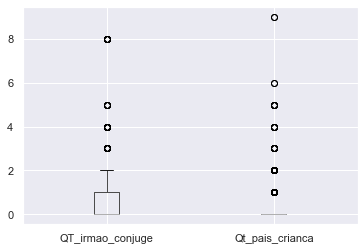

In [147]:
df_all.boxplot(column=['QT_irmao_conjuge','Qt_pais_crianca'])

In [148]:
display(df_all[df_all['Qt_pais_crianca']>4].style.background_gradient(cmap='viridis', subset=['Qt_pais_crianca']))
display(df_all[df_all['QT_irmao_conjuge']> 4].style.background_gradient(cmap='viridis', subset=['QT_irmao_conjuge']))

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.275000,nan,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)",female,38.000000,1,5,347077,31.387500,nan,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)",female,39.000000,1,5,347082,31.275000,nan,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.000000,0,5,3101295,39.687500,nan,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.000000,1,6,CA 2144,46.900000,nan,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.125000,nan,Q
1030,1031,0,3,"Goodwin, Mr. Charles Frederick",male,40.000000,1,6,CA 2144,46.900000,nan,S
1065,1066,0,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.000000,1,5,347077,31.387500,nan,S
1233,1234,0,3,"Sage, Mr. John George",male,nan,1,9,CA. 2343,69.550000,nan,S
1256,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,nan,1,9,CA. 2343,69.550000,nan,S


,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.900000,nan,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.900000,nan,S
159,160,0,3,"Sage, Master. Thomas Henry",male,nan,8,2,CA. 2343,69.550000,nan,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,nan,8,2,CA. 2343,69.550000,nan,S
201,202,0,3,"Sage, Mr. Frederick",male,nan,8,2,CA. 2343,69.550000,nan,S
324,325,0,3,"Sage, Mr. George John Jr",male,nan,8,2,CA. 2343,69.550000,nan,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,CA 2144,46.900000,nan,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.000000,5,2,CA 2144,46.900000,nan,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.000000,5,2,CA 2144,46.900000,nan,S
792,793,0,3,"Sage, Miss. Stella Anna",female,nan,8,2,CA. 2343,69.550000,nan,S


<AxesSubplot:>

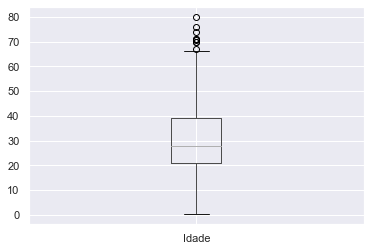

In [149]:
df_all.boxplot(column='Idade')

In [150]:
df_all[df_all['Idade']> 70].style.background_gradient(cmap='viridis', subset=['Idade'])

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000000,0,0,PC 17754,34.654200,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500000,0,0,370369,7.750000,nan,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.504200,nan,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000000,0,0,27042,30.000000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.000000,0,0,347060,7.775000,nan,S
987,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence Siegel)",female,76.000000,1,0,19877,78.850000,C46,S


<AxesSubplot:xlabel='sobreviveu', ylabel='count'>

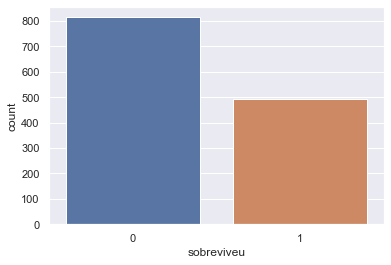

In [151]:
sns.countplot(x='sobreviveu', data=df_all)

<AxesSubplot:xlabel='sobreviveu', ylabel='count'>

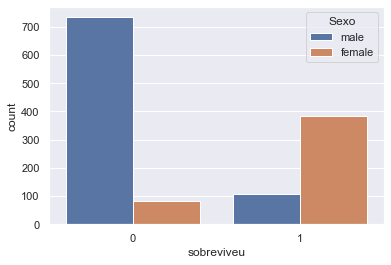

In [152]:
sns.countplot(x='sobreviveu', hue='Sexo', data=df_all)

<AxesSubplot:xlabel='Classe', ylabel='count'>

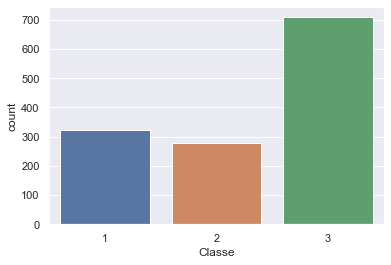

In [153]:
sns.countplot(x='Classe', data=df_all)

<AxesSubplot:xlabel='sobreviveu', ylabel='count'>

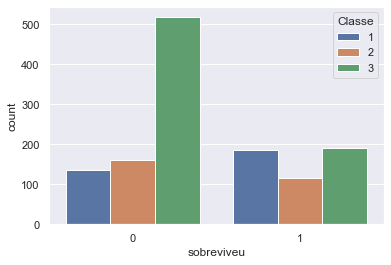

In [154]:
sns.countplot(x='sobreviveu', hue='Classe', data=df_all)

In [155]:
df_all['Embarque'].mode() # O mode é o valor que aparece mais

0    S
dtype: object

In [156]:
df_all.isnull().sum()

Id                     0
sobreviveu             0
Classe                 0
Nome                   0
Sexo                   0
Idade                263
QT_irmao_conjuge       0
Qt_pais_crianca        0
bilhete                0
Tarifa                 1
Cabine              1014
Embarque               2
dtype: int64

In [157]:
df_all[df_all['Embarque'].isna()]

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [158]:
df_all[df_all['bilhete'] == '113572' ]

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Classe', ylabel='count'>

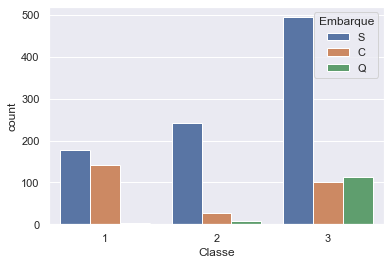

In [159]:
sns.countplot(x='Classe', hue='Embarque', data=df_all)

In [160]:
df_all['Embarque'] = df_all['Embarque'].fillna(df_all['Embarque'].mode()[0])

In [161]:
df_all[df_all['bilhete'] == '113572' ]

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [162]:
df_all['Cabine'] = df_all['Cabine'].fillna('X-Desconhecido') # sinalisar desonhecido

In [163]:
df_all[df_all['Tarifa'].isna()]

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
1043,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,X-Desconhecido,S


In [164]:
df_all[df_all['Classe'] == 3].Tarifa.mean()

13.302888700564973

In [165]:
df_all['Tarifa'] = df_all['Tarifa'].fillna(df_all[df_all['Classe'] == 3].Tarifa.mean()) # sinalisar desonhecido

In [166]:
df_all[df_all['Id'] == 1044]

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
1043,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.302889,X-Desconhecido,S


In [167]:
df_all.isnull().sum()

Id                    0
sobreviveu            0
Classe                0
Nome                  0
Sexo                  0
Idade               263
QT_irmao_conjuge      0
Qt_pais_crianca       0
bilhete               0
Tarifa                0
Cabine                0
Embarque              0
dtype: int64

In [168]:
df_all.groupby(['Sexo', 'Classe'])['Idade']

In [169]:
#Idade é preenchido com a mediana das idades por Sexo e por Classe
df_all['Idade'] = df_all.groupby(['Sexo', 'Classe'])['Idade'].apply(lambda x: x.fillna(x.median()))

In [170]:
df_all

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X-Desconhecido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X-Desconhecido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X-Desconhecido,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,X-Desconhecido,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X-Desconhecido,S
1307,1308,0,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,X-Desconhecido,S


In [171]:
df_all.isnull().sum()

Id                  0
sobreviveu          0
Classe              0
Nome                0
Sexo                0
Idade               0
QT_irmao_conjuge    0
Qt_pais_crianca     0
bilhete             0
Tarifa              0
Cabine              0
Embarque            0
dtype: int64

In [172]:
df_all['Cabine'] = df_all['Cabine'].apply(lambda x: x[0])

idx = df_all[df_all['Cabine'] == 'T'].index
df_all.loc[idx, 'Cabine'] = 'A'

df_all['Cabine'] = df_all['Cabine'].replace(['A', 'B', 'C'], 'ABC')
df_all['Cabine'] = df_all['Cabine'].replace(['D', 'E'], 'DE')
df_all['Cabine'] = df_all['Cabine'].replace(['F', 'G'], 'FG')

In [173]:
df_all

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,ABC,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,ABC,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,X,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,ABC,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S
1307,1308,0,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,X,S


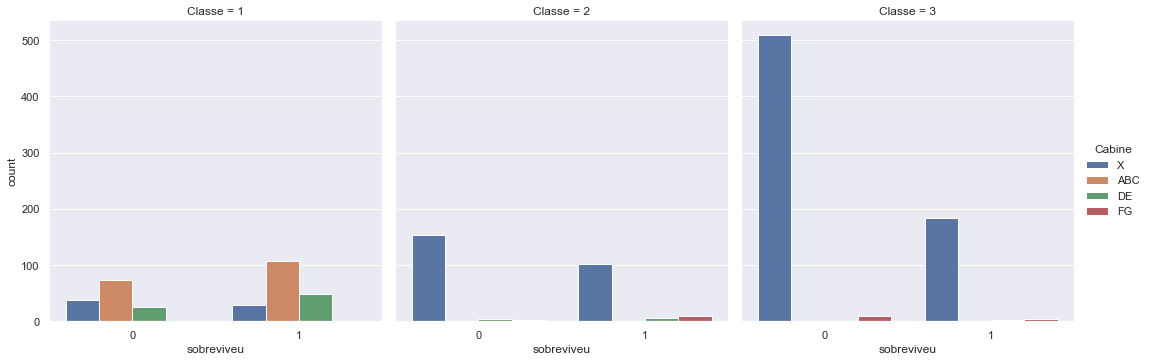

In [174]:
sns.catplot(x='sobreviveu', hue='Cabine', col='Classe',kind="count", data=df_all)

In [175]:
names = df_all['Nome'].str.split(',')
names = names.apply(lambda x: x[1]).str.split(" ")
names = names.apply(lambda x: x[1])
df_all['Titulo'] = names

df_all["Titulo"] = df_all["Titulo"].replace(to_replace=["Major." ,"Col.","Capt.","the","Don.",
                                                      "Jonkheer.","Lady.","Sir.", "Dona.",
                                                     "Rev.", "Dr."], value="Noble") 
df_all["Titulo"] = df_all["Titulo"].replace(to_replace=["Mlle.","Ms."],value="Miss.") 
df_all["Titulo"] = df_all["Titulo"].replace(to_replace=["Mme."], value="Mrs.") 

df_all["Titulo"].value_counts()

Mr.        757
Miss.      264
Mrs.       198
Master.     61
Noble       29
Name: Titulo, dtype: int64

In [176]:
surnames = df_all['Nome'].str.split(',')
surnames = surnames.map(lambda x: x[0])
df_all['Surname'] = surnames

~~~
Crie novos recursos
Ticket_frequency para a contagem de cada ticket
Família que é a união de SibSp + Parch + 1 (a própria pessoa)
A família é mapeada por tamanho (sozinha, pequena, média e grande)
O FareBin mapeia a tarifa em 4 intervalos
O AgeBin mapeia a Idade em 5 intervalos

~~~

In [177]:
df_all['Ticket_Frequency'] = df_all.groupby('bilhete')['bilhete'].transform('count')

df_all['Familia'] = df_all['QT_irmao_conjuge'] + df_all['Qt_pais_crianca'] + 1

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Familia'] = df_all['Familia'].map(family_map)

df_all['FareBin'] = pd.qcut(df_all['Tarifa'], 4)

df_all['AgeBin'] = pd.cut(df_all['Idade'].astype(int), 5)

In [178]:
df_all

,Id,sobreviveu,Classe,Nome,Sexo,Idade,QT_irmao_conjuge,Qt_pais_crianca,bilhete,Tarifa,Cabine,Embarque,Titulo,Surname,Ticket_Frequency,Familia,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr.,Braund,1,Small,"(-0.001, 7.896]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,ABC,C,Mrs.,Cumings,2,Small,"(31.275, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss.,Heikkinen,1,Alone,"(7.896, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,ABC,S,Mrs.,Futrelle,2,Small,"(31.275, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr.,Allen,1,Alone,"(7.896, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,X,S,Mr.,Spector,1,Alone,"(7.896, 14.454]","(16.0, 32.0]"
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,ABC,C,Noble,Oliva y Ocana,3,Alone,"(31.275, 512.329]","(32.0, 48.0]"
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S,Mr.,Saether,1,Alone,"(-0.001, 7.896]","(32.0, 48.0]"
1307,1308,0,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,X,S,Mr.,Ware,1,Alone,"(7.896, 14.454]","(16.0, 32.0]"


In [ ]:
df_all = df_all.drop(['SibSp','Parch','Fare','Age','Name','Ticket','PassengerId'], axis=1)

# df_all["Sex"], _ = pd.factorize(df_all["Sex"], sort=True)
df_all["Embarked"], _ = pd.factorize(df_all["Embarked"], sort=True)
df_all["Title"], _ = pd.factorize(df_all["Title"], sort=True)
df_all["Cabin"], _ = pd.factorize(df_all["Cabin"], sort=True)
df_all["AgeBin"], _ = pd.factorize(df_all["AgeBin"], sort=True)
df_all["FareBin"], _ = pd.factorize(df_all["FareBin"], sort=True)
df_all["Family"], _ = pd.factorize(df_all["Family"], sort=True)
df_all["Surname"], _ = pd.factorize(df_all["Surname"], sort=True)

df_all = pd.get_dummies(df_all) #Sex
df_all.head()